Importando Bibliotecas

In [43]:
!pip install --use-deprecated=legacy-resolver pycaret[full]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 4.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
panel 0.12.7 requires bokeh<2.5.0,>=2.4.0, but you'll have bokeh 3.0.3 which is incompatible.
explainerdashboard 0.4.1.1 requires scikit-learn>=1.1, but you'll have scikit-learn 0.23.2 which is incompatible.
evidently 0.2.4 requires scikit-learn>=0.24.0, but you'll have scikit-learn 0.23.2 which is incompatible.
docker 6.0.1 requires requests>=2.26.0, but you'll have requests 2.25.1 which is incompatible.
autoviz 0.1.58 requires matplotlib>=3.3.3, but you'll have matplotlib 3.2.2 whic

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

Importando arquivo da pasta do Google Drive

In [159]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
Dados = pd.read_csv('/content/drive/MyDrive/[Lighthouse] Desafio Cientista de Dados/desafio_manutencao_preditiva_treino.csv')

Dados

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


Pequena análise exploratória dos dados

In [153]:
Dados.dtypes

udi                        int64
product_id                object
type                      object
air_temperature_k        float64
process_temperature_k    float64
rotational_speed_rpm       int64
torque_nm                float64
tool_wear_min              int64
failure_type              object
dtype: object

In [154]:
Dados.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
udi,6667.0,NaN,NaN,NaN,4994.589921,2896.125718,1.0,2496.5,4983.0,7510.5,10000.0
product_id,6667,6667,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,6667,3,L,4022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
air_temperature_k,6667.0,NaN,NaN,NaN,299.992515,1.99471,295.3,298.3,300.0,301.5,304.5
process_temperature_k,6667.0,NaN,NaN,NaN,309.99262,1.488101,305.7,308.8,310.0,311.1,313.8
rotational_speed_rpm,6667.0,NaN,NaN,NaN,1537.419529,177.182908,1168.0,1422.5,1503.0,1612.0,2886.0
torque_nm,6667.0,NaN,NaN,NaN,40.058512,9.950804,3.8,33.2,40.2,46.8,76.6
tool_wear_min,6667.0,NaN,NaN,NaN,108.098095,63.359915,0.0,54.0,108.0,162.0,251.0
failure_type,6667,6,No Failure,6435,NaN,NaN,NaN,NaN,NaN,NaN,NaN


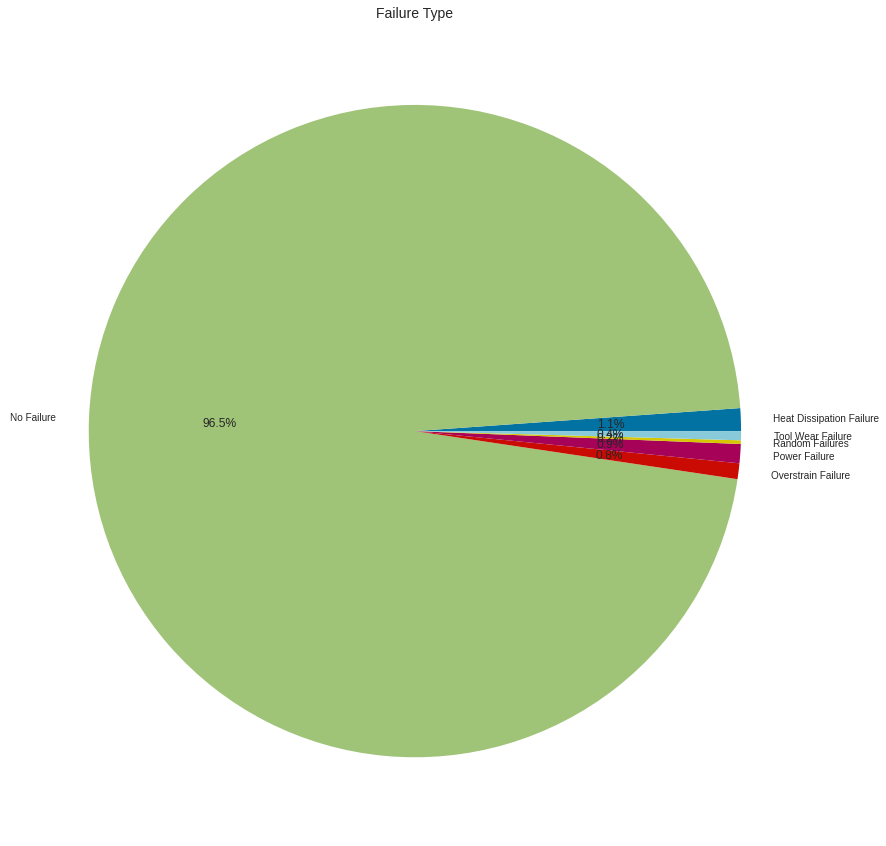

In [158]:
labels = Dados['failure_type'].astype('category').cat.categories.tolist()
counts = Dados['failure_type'].value_counts()
sizes = [counts[machine_name] for machine_name in labels]
plt.figure(figsize=(15,15))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False)
plt.title("Failure Type", fontsize=14)
plt.show()

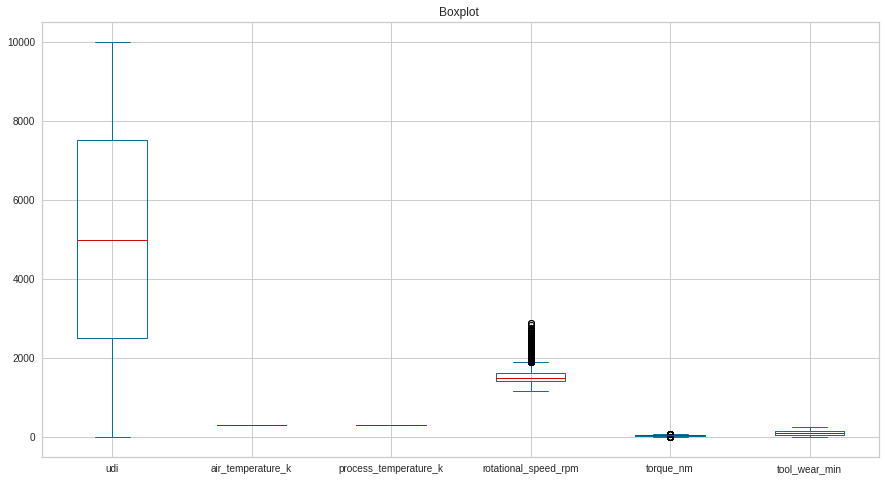

In [163]:
Dados.plot(kind='box', figsize=(15, 8))
plt.title('Boxplot ')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f2ff415b0>,
      dtype=object)

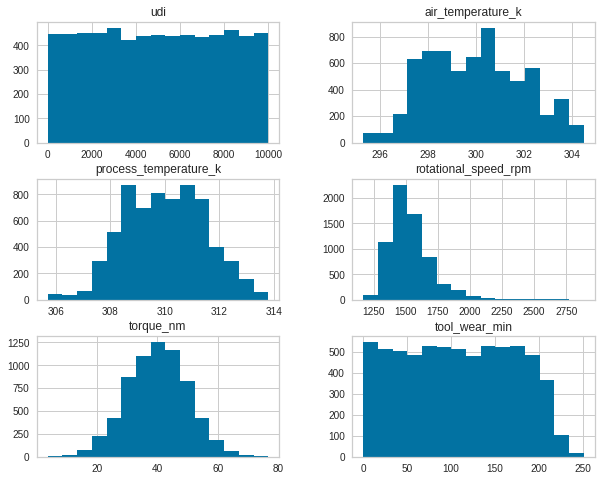

In [164]:
Dados.hist(bins=15,figsize=(10, 8))

Transformando a coluna de tipo de falha em Dummies para conseguir trabalhar melhor com o Dataset

In [48]:
Dados = pd.get_dummies(Dados, columns = ['failure_type'])
Dados

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type_Heat Dissipation Failure,failure_type_No Failure,failure_type_Overstrain Failure,failure_type_Power Failure,failure_type_Random Failures,failure_type_Tool Wear Failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,1,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,1,0,0,0,0
2,5,L47184,L,298.2,308.7,1408,40.0,9,0,1,0,0,0,0
3,6,M14865,M,298.1,308.6,1425,41.9,11,0,1,0,0,0,0
4,7,L47186,L,298.1,308.6,1558,42.4,14,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,0,1,0,0,0,0
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,0,1,0,0,0,0
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,0,1,0,0,0,0
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,0,1,0,0,0,0


Tabela de Correlações

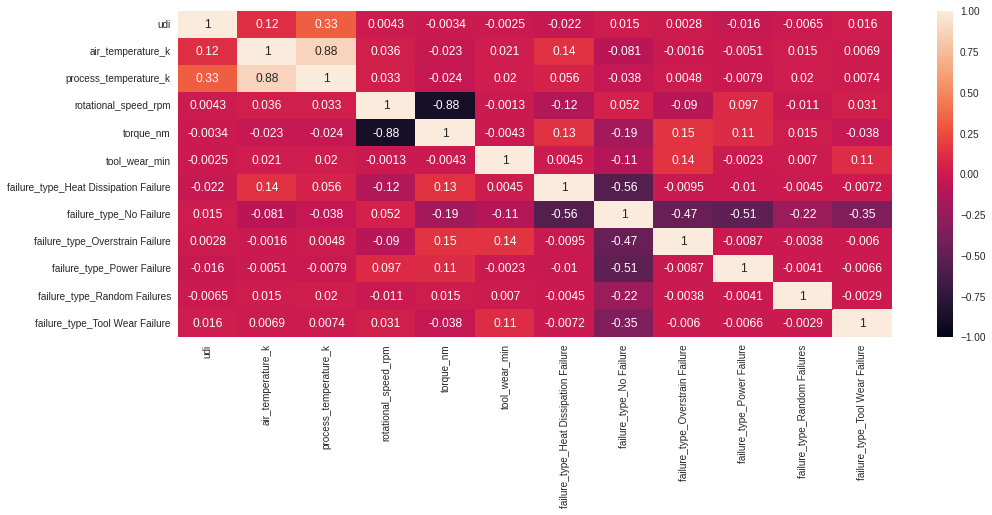

In [49]:
plt.figure(figsize=(16, 6))
sns.heatmap(Dados.corr(), vmin=-1, vmax=1, annot=True);

Retirando colunas que não parecem ser relevantes em comparação com os demais ou foram transformadas em Dummies.  

In [50]:
Dados.drop(['udi', 'product_id', 'type', 'failure_type_No Failure'], axis=1, inplace=True )

In [51]:
Dados

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type_Heat Dissipation Failure,failure_type_Overstrain Failure,failure_type_Power Failure,failure_type_Random Failures,failure_type_Tool Wear Failure
0,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,298.2,308.7,1408,40.0,9,0,0,0,0,0
3,298.1,308.6,1425,41.9,11,0,0,0,0,0
4,298.1,308.6,1558,42.4,14,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6662,298.8,308.3,1634,27.9,12,0,0,0,0,0
6663,298.8,308.4,1604,29.5,14,0,0,0,0,0
6664,298.9,308.4,1632,31.8,17,0,0,0,0,0
6665,299.0,308.7,1408,48.5,25,0,0,0,0,0


Dividindo os dados, criando um dataset para cada tipo de falha:

In [52]:
DadosTWF = Dados
DadosTWF = DadosTWF.drop(['failure_type_Overstrain Failure', 'failure_type_Power Failure', 'failure_type_Random Failures', 'failure_type_Heat Dissipation Failure'], axis=1)
DadosTWF

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type_Tool Wear Failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.2,308.7,1408,40.0,9,0
3,298.1,308.6,1425,41.9,11,0
4,298.1,308.6,1558,42.4,14,0
...,...,...,...,...,...,...
6662,298.8,308.3,1634,27.9,12,0
6663,298.8,308.4,1604,29.5,14,0
6664,298.9,308.4,1632,31.8,17,0
6665,299.0,308.7,1408,48.5,25,0


In [53]:
DadosHDF = Dados
DadosHDF = DadosHDF.drop(['failure_type_Overstrain Failure', 'failure_type_Random Failures', 'failure_type_Tool Wear Failure', 'failure_type_Power Failure'], axis=1 )
DadosHDF

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type_Heat Dissipation Failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.2,308.7,1408,40.0,9,0
3,298.1,308.6,1425,41.9,11,0
4,298.1,308.6,1558,42.4,14,0
...,...,...,...,...,...,...
6662,298.8,308.3,1634,27.9,12,0
6663,298.8,308.4,1604,29.5,14,0
6664,298.9,308.4,1632,31.8,17,0
6665,299.0,308.7,1408,48.5,25,0


In [54]:
DadosPWF = Dados
DadosPWF = DadosPWF.drop(['failure_type_Overstrain Failure','failure_type_Heat Dissipation Failure', 'failure_type_Random Failures', 'failure_type_Tool Wear Failure'], axis=1 )
DadosPWF

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type_Power Failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.2,308.7,1408,40.0,9,0
3,298.1,308.6,1425,41.9,11,0
4,298.1,308.6,1558,42.4,14,0
...,...,...,...,...,...,...
6662,298.8,308.3,1634,27.9,12,0
6663,298.8,308.4,1604,29.5,14,0
6664,298.9,308.4,1632,31.8,17,0
6665,299.0,308.7,1408,48.5,25,0


In [55]:
DadosOSF = Dados
DadosOSF = DadosOSF.drop([ 'failure_type_Power Failure','failure_type_Heat Dissipation Failure', 'failure_type_Random Failures', 'failure_type_Tool Wear Failure'], axis=1 )
DadosOSF

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type_Overstrain Failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.2,308.7,1408,40.0,9,0
3,298.1,308.6,1425,41.9,11,0
4,298.1,308.6,1558,42.4,14,0
...,...,...,...,...,...,...
6662,298.8,308.3,1634,27.9,12,0
6663,298.8,308.4,1604,29.5,14,0
6664,298.9,308.4,1632,31.8,17,0
6665,299.0,308.7,1408,48.5,25,0


In [56]:
DadosRNF = Dados
DadosRNF = DadosRNF.drop([ 'failure_type_Power Failure','failure_type_Heat Dissipation Failure','failure_type_Overstrain Failure', 'failure_type_Tool Wear Failure'], axis=1)
DadosRNF

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type_Random Failures
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.2,308.7,1408,40.0,9,0
3,298.1,308.6,1425,41.9,11,0
4,298.1,308.6,1558,42.4,14,0
...,...,...,...,...,...,...
6662,298.8,308.3,1634,27.9,12,0
6663,298.8,308.4,1604,29.5,14,0
6664,298.9,308.4,1632,31.8,17,0
6665,299.0,308.7,1408,48.5,25,0


In [57]:
# Por vezes é necessário voltar para  a primeira célula e reinstalar o pycaret #

from pycaret.classification import *

Selecionando, Criando e Salvando o Modelo para  RNF

In [118]:
RNF = setup(data = DadosRNF, target = 'failure_type_Random Failures')
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9983,0.3058,0.0,0.0,0.0,NaN,0.0000,0.047
knn,K Neighbors Classifier,0.9983,0.3975,0.0,0.0,0.0,NaN,0.0000,0.036
nb,Naive Bayes,0.9983,0.3647,0.0,0.0,0.0,NaN,0.0000,0.017
svm,SVM - Linear Kernel,0.9983,0.0000,0.0,0.0,0.0,NaN,0.0000,0.026
ridge,Ridge Classifier,0.9983,0.0000,0.0,0.0,0.0,NaN,0.0000,0.016
rf,Random Forest Classifier,0.9983,0.4714,0.0,0.0,0.0,NaN,0.0000,0.566
qda,Quadratic Discriminant Analysis,0.9983,0.2023,0.0,0.0,0.0,NaN,0.0000,0.030
lda,Linear Discriminant Analysis,0.9983,0.3833,0.0,0.0,0.0,NaN,0.0000,0.020
et,Extra Trees Classifier,0.9983,0.4726,0.0,0.0,0.0,NaN,0.0000,0.245
xgboost,Extreme Gradient Boosting,0.9983,0.4935,0.0,0.0,0.0,NaN,0.0000,0.161


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8168, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8168, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
RNF_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9979,0.4099,0.0,0.0,0.0,0.0,0.0
1,0.9979,0.4399,0.0,0.0,0.0,0.0,0.0
2,0.9979,0.2425,0.0,0.0,0.0,0.0,0.0
3,0.9979,0.0472,0.0,0.0,0.0,0.0,0.0
4,0.9979,0.3820,0.0,0.0,0.0,0.0,0.0
5,0.9979,0.4592,0.0,0.0,0.0,0.0,0.0
6,1.0000,0.0000,0.0,0.0,0.0,NaN,0.0
7,1.0000,0.0000,0.0,0.0,0.0,NaN,0.0
8,0.9979,0.8022,0.0,0.0,0.0,0.0,0.0


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8168, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [120]:
modelo_final_RNF = finalize_model(RNF_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8168, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8168, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_i

In [121]:
save_model(modelo_final_RNF, 'modelo_RNF')


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8168, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=modelo_RNF, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='failure_type_Random Failures',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categoric

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='failure_type_Random Failures',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numeric...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
           

Selecionando, Criando e Salvando o Modelo para OSF

In [123]:
OSF = setup(data = DadosOSF, target = 'failure_type_Overstrain Failure')
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9940,0.9965,0.5583,0.6050,0.5670,0.5642,0.5714,0.169
rf,Random Forest Classifier,0.9938,0.9960,0.3583,0.7000,0.4490,0.4469,0.4837,0.357
qda,Quadratic Discriminant Analysis,0.9936,0.9949,0.6667,0.6033,0.6236,0.6204,0.6261,0.018
catboost,CatBoost Classifier,0.9934,0.9969,0.5083,0.5417,0.5121,0.5092,0.5154,4.618
dt,Decision Tree Classifier,0.9931,0.7444,0.4917,0.6217,0.5190,0.5159,0.5339,0.019
ada,Ada Boost Classifier,0.9931,0.9943,0.4583,0.5933,0.5067,0.5034,0.5128,0.186
gbc,Gradient Boosting Classifier,0.9931,0.9904,0.4917,0.6233,0.5090,0.5060,0.5277,0.798
et,Extra Trees Classifier,0.9929,0.9955,0.2083,0.6000,0.3033,0.3013,0.3472,0.427
xgboost,Extreme Gradient Boosting,0.9929,0.9952,0.5250,0.5617,0.5334,0.5301,0.5350,0.153
lr,Logistic Regression,0.9927,0.9965,0.3667,0.5500,0.4138,0.4110,0.4318,0.764


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2896, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2896, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [124]:
OSF_model = create_model('lightgbm')
modelo_final_OSF = finalize_model(OSF_model)
save_model(modelo_final_OSF, 'modelo_OSF')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9936,0.9935,0.5000,0.6667,0.5714,0.5683,0.5742
1,0.9957,0.9978,0.5000,1.0000,0.6667,0.6648,0.7056
2,0.9979,0.9989,1.0000,0.8000,0.8889,0.8878,0.8935
3,0.9957,0.9973,0.7500,0.7500,0.7500,0.7478,0.7478
4,0.9893,0.9978,0.0000,0.0000,0.0000,-0.0034,-0.0043
5,0.9957,0.9968,0.7500,0.7500,0.7500,0.7478,0.7478
6,0.9936,0.9971,0.3333,0.5000,0.4000,0.3969,0.4052
7,0.9979,0.9993,1.0000,0.7500,0.8571,0.8561,0.8651
8,0.9893,0.9892,0.2500,0.3333,0.2857,0.2804,0.2834


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2896, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100,

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='failure_type_Overstrain Failure',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_nume...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sampl

Selecionando, Criando e Salvando o Modelo para PWF

In [125]:
PWF = setup(data = DadosPWF, target = 'failure_type_Power Failure')
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9976,0.9991,0.865,0.8988,0.8711,0.8700,0.8754,0.081
xgboost,Extreme Gradient Boosting,0.9970,0.9935,0.835,0.8483,0.8350,0.8335,0.8369,0.256
dt,Decision Tree Classifier,0.9964,0.8941,0.790,0.8300,0.7957,0.7939,0.8010,0.033
lightgbm,Light Gradient Boosting Machine,0.9964,0.9809,0.735,0.8517,0.7802,0.7784,0.7849,0.179
ada,Ada Boost Classifier,0.9961,0.9869,0.720,0.8567,0.7615,0.7597,0.7729,0.187
et,Extra Trees Classifier,0.9961,0.9989,0.660,0.9167,0.7563,0.7545,0.7703,0.356
gbc,Gradient Boosting Classifier,0.9959,0.9508,0.745,0.8100,0.7635,0.7615,0.7684,0.411
rf,Random Forest Classifier,0.9957,0.9857,0.730,0.8250,0.7648,0.7626,0.7690,0.686
catboost,CatBoost Classifier,0.9957,0.9982,0.755,0.8217,0.7694,0.7673,0.7768,4.498
qda,Quadratic Discriminant Analysis,0.9953,0.9975,0.870,0.7179,0.7801,0.7777,0.7847,0.017


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7237, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7237, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
PWF_model = create_model('lr')
modelo_final_PWF = finalize_model(PWF_model)
save_model(modelo_final_PWF, 'modelo_PWF')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9936,0.9974,0.6000,0.7500,0.6667,0.6635,0.6677
4,0.9979,0.9991,0.8000,1.0000,0.8889,0.8878,0.8935
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9936,0.9968,0.5000,0.6667,0.5714,0.5683,0.5742
8,0.9979,1.0000,0.7500,1.0000,0.8571,0.8561,0.8651


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7237, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7237, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experimen

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='failure_type_Power Failure',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
           

Selecionando, Criando e Salvando o Modelo para HDF

In [127]:
HDF = setup(data = DadosHDF, target = 'failure_type_Heat Dissipation Failure')
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9970,0.9826,0.8000,0.9548,0.8637,0.8623,0.8691,0.090
ada,Ada Boost Classifier,0.9964,0.9962,0.7833,0.9148,0.8339,0.8321,0.8397,0.369
xgboost,Extreme Gradient Boosting,0.9964,0.9973,0.7600,0.9217,0.8233,0.8215,0.8303,0.147
catboost,CatBoost Classifier,0.9961,0.9979,0.7200,0.9500,0.7959,0.7942,0.8119,4.745
gbc,Gradient Boosting Classifier,0.9959,0.9946,0.7833,0.8883,0.8170,0.8150,0.8244,0.623
dt,Decision Tree Classifier,0.9942,0.8604,0.7233,0.8100,0.7516,0.7487,0.7563,0.019
rf,Random Forest Classifier,0.9936,0.9875,0.5600,0.8821,0.6698,0.6668,0.6917,0.547
qda,Quadratic Discriminant Analysis,0.9934,0.9965,0.6267,0.7558,0.6734,0.6702,0.6790,0.029
lr,Logistic Regression,0.9916,0.9949,0.4300,0.7350,0.5226,0.5190,0.5464,0.046
et,Extra Trees Classifier,0.9912,0.9950,0.2900,0.8333,0.4222,0.4193,0.4826,0.250


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5600, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5600, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [128]:
HDF_model = create_model('lightgbm')
modelo_final_HDF = finalize_model(HDF_model)
save_model(modelo_final_PWF, 'modelo_HDF')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9979,1.0000,0.8000,1.0000,0.8889,0.8878,0.8935
1,0.9957,0.9996,0.6667,1.0000,0.8000,0.7979,0.8147
2,0.9957,0.9986,0.8333,0.8333,0.8333,0.8312,0.8312
3,0.9979,0.9996,0.8333,1.0000,0.9091,0.9080,0.9119
4,0.9979,0.9946,0.8333,1.0000,0.9091,0.9080,0.9119
5,0.9936,0.8344,0.8333,0.7143,0.7692,0.7660,0.7683
6,0.9957,0.9996,0.6000,1.0000,0.7500,0.7480,0.7729
7,0.9979,1.0000,0.8000,1.0000,0.8889,0.8878,0.8935
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5600, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100,

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='failure_type_Heat Dissipation '
                                              'Failure',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_val...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C

Criando Modelo TWF

In [130]:
TWF = setup(data = DadosTWF, target = 'failure_type_Tool Wear Failure')
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9949,0.5055,0.0000,0.0,0.0000,0.0000,0.0000,0.066
svm,SVM - Linear Kernel,0.9949,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.038
ridge,Ridge Classifier,0.9949,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.025
rf,Random Forest Classifier,0.9949,0.8811,0.0000,0.0,0.0000,0.0000,0.0000,0.472
lda,Linear Discriminant Analysis,0.9949,0.9552,0.0000,0.0,0.0000,0.0000,0.0000,0.031
dummy,Dummy Classifier,0.9949,0.5000,0.0000,0.0,0.0000,0.0000,0.0000,0.021
lr,Logistic Regression,0.9946,0.9724,0.0000,0.0,0.0000,-0.0003,-0.0003,0.650
et,Extra Trees Classifier,0.9946,0.8329,0.0000,0.0,0.0000,-0.0003,-0.0004,0.462
nb,Naive Bayes,0.9944,0.9659,0.0000,0.0,0.0000,-0.0004,-0.0004,0.029
qda,Quadratic Discriminant Analysis,0.9944,0.9592,0.0000,0.0,0.0000,-0.0006,-0.0006,0.018


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [131]:
TWF_model = create_model('lr')
modelo_final_TWF = finalize_model(TWF_model)
save_model(modelo_final_TWF, 'modelo_TWF')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9957,0.9785,0.0,0.0,0.0,0.0000,0.0000
1,0.9957,0.9645,0.0,0.0,0.0,0.0000,0.0000
2,0.9936,0.9713,0.0,0.0,0.0,0.0000,0.0000
3,0.9936,0.9741,0.0,0.0,0.0,0.0000,0.0000
4,0.9936,0.9835,0.0,0.0,0.0,0.0000,0.0000
5,0.9936,0.9770,0.0,0.0,0.0,0.0000,0.0000
6,0.9957,0.9580,0.0,0.0,0.0,0.0000,0.0000
7,0.9957,0.9881,0.0,0.0,0.0,0.0000,0.0000
8,0.9957,0.9709,0.0,0.0,0.0,0.0000,0.0000


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6885, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6885, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experimen

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='failure_type_Tool Wear Failure',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numeri...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
          



---



---



---
Finalizada Etapa dos Modelos e testes, agora é hora de utilizar os modelos e salvar as predições conforme exigido.


Abrindo a planilha de Teste

In [132]:
Teste = pd.read_csv('/content/drive/MyDrive/[Lighthouse] Desafio Cientista de Dados/desafio_manutencao_preditiva_teste.csv')
Teste

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
0,446,L47625,L,297.5,308.6,1793,26.7,70
1,7076,L54255,L,300.7,310.5,1536,47.4,192
2,1191,L48370,L,297.2,308.4,1460,42.1,41
3,2618,L49797,L,299.4,309.1,1670,35.9,68
4,5067,L52246,L,304.1,313.1,1550,30.9,9
...,...,...,...,...,...,...,...,...
3328,5554,L52733,L,302.5,311.9,1306,59.7,172
3329,6961,L54140,L,300.7,311.0,1413,52.0,91
3330,6914,L54093,L,300.8,311.2,1481,38.5,181
3331,5510,L52689,L,302.8,312.2,1509,36.5,52


Aplicando os modelos de cada uma das falhas que criamos anteriormente

In [133]:
df = Teste
modelo = load_model('modelo_HDF')

df['predictedValues_HDF']=modelo.predict(df[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']])
print(df['predictedValues_HDF'])

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=modelo_HDF, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: predictedValues_HDF, Length: 3333, dtype: uint8


In [134]:
df

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,predictedValues_HDF
0,446,L47625,L,297.5,308.6,1793,26.7,70,0
1,7076,L54255,L,300.7,310.5,1536,47.4,192,0
2,1191,L48370,L,297.2,308.4,1460,42.1,41,0
3,2618,L49797,L,299.4,309.1,1670,35.9,68,0
4,5067,L52246,L,304.1,313.1,1550,30.9,9,0
...,...,...,...,...,...,...,...,...,...
3328,5554,L52733,L,302.5,311.9,1306,59.7,172,0
3329,6961,L54140,L,300.7,311.0,1413,52.0,91,0
3330,6914,L54093,L,300.8,311.2,1481,38.5,181,0
3331,5510,L52689,L,302.8,312.2,1509,36.5,52,0


In [135]:
df2 = df
modelo = load_model('modelo_OSF')

df2['predictedValues_OSF']=modelo.predict(df[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']])
print(df2['predictedValues_OSF'])


INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=modelo_OSF, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: predictedValues_OSF, Length: 3333, dtype: uint8


In [136]:
df2

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,predictedValues_HDF,predictedValues_OSF
0,446,L47625,L,297.5,308.6,1793,26.7,70,0,0
1,7076,L54255,L,300.7,310.5,1536,47.4,192,0,0
2,1191,L48370,L,297.2,308.4,1460,42.1,41,0,0
3,2618,L49797,L,299.4,309.1,1670,35.9,68,0,0
4,5067,L52246,L,304.1,313.1,1550,30.9,9,0,0
...,...,...,...,...,...,...,...,...,...,...
3328,5554,L52733,L,302.5,311.9,1306,59.7,172,0,0
3329,6961,L54140,L,300.7,311.0,1413,52.0,91,0,0
3330,6914,L54093,L,300.8,311.2,1481,38.5,181,0,0
3331,5510,L52689,L,302.8,312.2,1509,36.5,52,0,0


In [137]:
df3 = df2
modelo = load_model('modelo_PWF')

df3['predictedValues_PWF']=modelo.predict(df[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']])
print(df3['predictedValues_PWF'])

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=modelo_PWF, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: predictedValues_PWF, Length: 3333, dtype: uint8


In [138]:
df4 = df3
modelo = load_model('modelo_RNF')

df4['predictedValues_RNF']=modelo.predict(df[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']])
print(df4['predictedValues_RNF'])

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=modelo_RNF, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: predictedValues_RNF, Length: 3333, dtype: uint8


In [139]:
df5 = df4
modelo = load_model('modelo_TWF')

df5['predictedValues_TWF']=modelo.predict(df[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']])
print(df5['predictedValues_TWF'])

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=modelo_TWF, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: predictedValues_TWF, Length: 3333, dtype: uint8


In [140]:
df5

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,predictedValues_HDF,predictedValues_OSF,predictedValues_PWF,predictedValues_RNF,predictedValues_TWF
0,446,L47625,L,297.5,308.6,1793,26.7,70,0,0,0,0,0
1,7076,L54255,L,300.7,310.5,1536,47.4,192,0,0,0,0,0
2,1191,L48370,L,297.2,308.4,1460,42.1,41,0,0,0,0,0
3,2618,L49797,L,299.4,309.1,1670,35.9,68,0,0,0,0,0
4,5067,L52246,L,304.1,313.1,1550,30.9,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,5554,L52733,L,302.5,311.9,1306,59.7,172,0,0,0,0,0
3329,6961,L54140,L,300.7,311.0,1413,52.0,91,0,0,0,0,0
3330,6914,L54093,L,300.8,311.2,1481,38.5,181,0,0,0,0,0
3331,5510,L52689,L,302.8,312.2,1509,36.5,52,0,0,0,0,0


> Exportando para CSV, será finalizado por lá daí, transfornando os 1 das colunas de predição para o seu devido nome de erro e unificando as colunas




In [142]:
from google.colab import files
df5.to_csv('predicted raw.csv', encoding = 'utf-8-sig') 
files.download('predicted raw.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>